In [1]:
import pretty_midi
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import numpy as np
np.set_printoptions(threshold=np.inf)

In [2]:
def del_ht_empty(pn):
    pn=pn.transpose()
    while 1:
        if sum(pn[:,0])==0:
            pn=np.delete(pn,0, axis = 1)
        else:
            break

    while 1:
        if sum(pn[:,-1])==0:
            pn=np.delete(pn,-1, axis = 1)
        else:
            break
    
    pn=pn.transpose()
    return pn

def GprimgBpn(pn):
    primg=[]
    for pni in pn:
        k=0
        for i in range(len(pni)-1,0,-1):#这里采用逆序因为旋律一般比和弦高 懒得处理和弦了
            if pni[i]!=0:
                primg.append(i)
                k=1
                break
        if k==0:
            primg.append(0)
    # midi出来的piano roll不是一个0 1序列 反而是一堆0和一个奇怪的数字。这个奇怪的数字是什么？
    # 这个奇怪的数字是力度。
    return primg

def GpizzaBmidi_10000(midi_data):
    left=midi_data.instruments[0].get_piano_roll().transpose()
    left=GprimgBpn(left)

    right=midi_data.instruments[1].get_piano_roll().transpose()
    right=GprimgBpn(right)

    w=max(len(left),len(right))
    while len(left)<w:
        left.append(0)
    while len(right)<w:
        right.append(0)
    for i in range(w):
        left[i]=max(left[i],right[i])
        
    while left[0]==0:
        del(left[0])
    while left[-1]==0:
        del(left[-1])
    
    position=0
    while len(left)<10000:
        left.append(left[position])
        position+=1
    left = np.asarray(left[0:10000])
    left.shape = (1,10000)
    return left

def GpizzaBmidi_n_1024(midi_data):
    left=midi_data.instruments[0].get_piano_roll().transpose()
    left=GprimgBpn(left)

    right=midi_data.instruments[1].get_piano_roll().transpose()
    right=GprimgBpn(right)

    w=max(len(left),len(right))
    while len(left)<w:
        left.append(0)
    while len(right)<w:
        right.append(0)
    for i in range(w):
        left[i]=max(left[i],right[i])
        
    while left[0]==0:
        del(left[0])
    while left[-1]==0:
        del(left[-1])
        
    number_of_partition = math.floor(len(left)/1024)+1
    
    
    position=0
    while len(left)<number_of_partition*1024:
        left.append(left[position])
        position+=1
    left = np.asarray(left[0:number_of_partition*1024])
    left.shape = (number_of_partition,1024)
    return left

def GpizzaBmidi_n_1024_10(midi_data):
    left=midi_data.instruments[0].get_piano_roll().transpose()
    left=GprimgBpn(left)

    right=midi_data.instruments[1].get_piano_roll().transpose()
    right=GprimgBpn(right)

    w=max(len(left),len(right))
    while len(left)<w:
        left.append(0)
    while len(right)<w:
        right.append(0)
    for i in range(w):
        left[i]=max(left[i],right[i])
        
    while left[0]==0:
        del(left[0])
    while left[-1]==0:
        del(left[-1])
        
    number_of_partition = math.floor(len(left)/1024)+1
    orginal_roll = left.copy()
    
    left = orginal_roll.copy()
    position=0
    while len(left)<number_of_partition*1024:
        left.append(left[position])
        position+=1
    left = np.asarray(left[0:number_of_partition*1024])
    left.shape = (number_of_partition,1024)
    result = left.copy()
    
    for i in range(9):
        for j in range(100):
            orginal_roll.append(orginal_roll[0])
            del(orginal_roll[0])
        left = orginal_roll.copy()
        position=0
        while len(left)<number_of_partition*1024:
            left.append(left[position])
            position+=1
        left = np.asarray(left[0:number_of_partition*1024])
        left.shape = (number_of_partition,1024)
        result = np.vstack((result,left))
        
    return result

In [5]:
midi_data = pretty_midi.PrettyMIDI('../0 dataset midi/appass_2.mid')
print(len(midi_data.instruments))

2


37


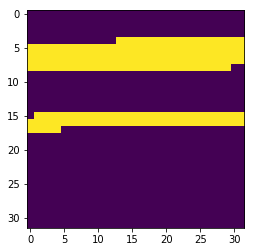

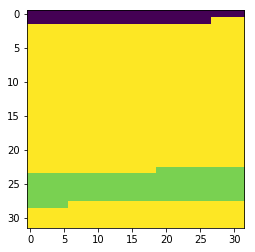

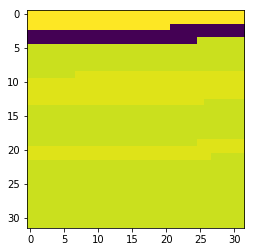

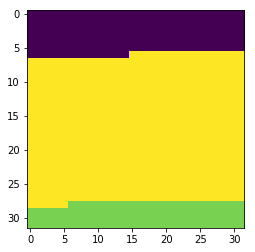

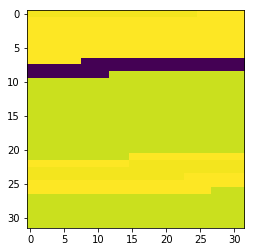

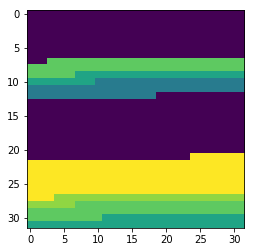

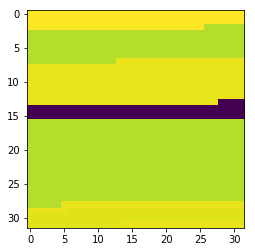

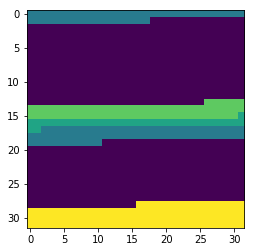

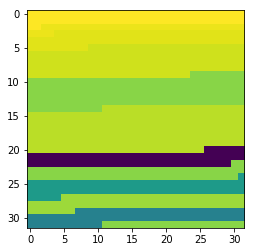

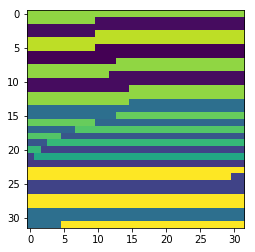

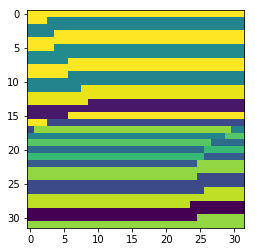

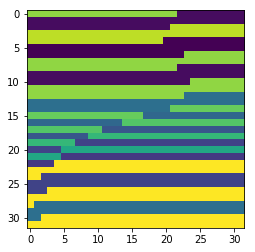

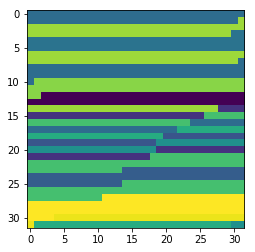

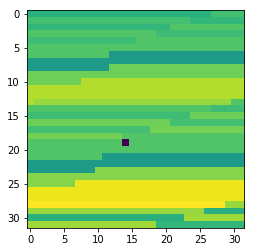

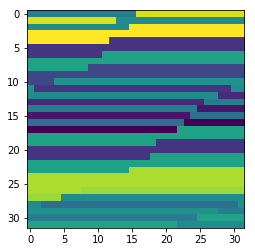

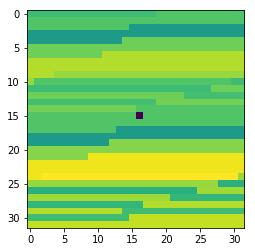

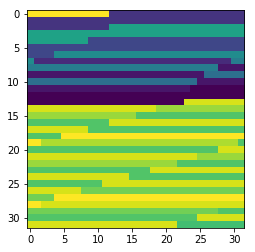

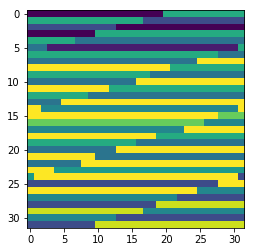

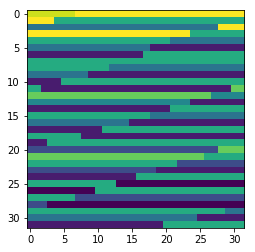

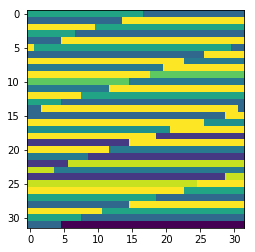

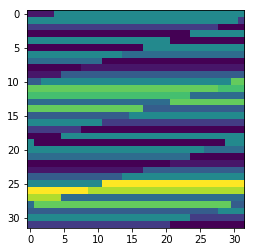

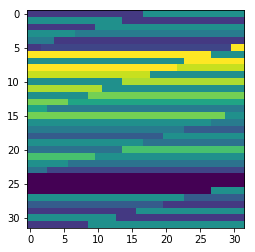

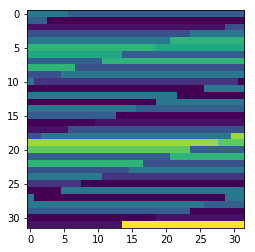

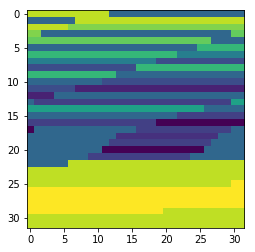

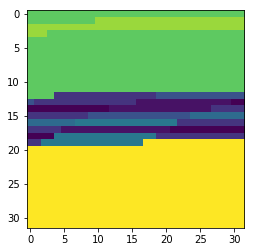

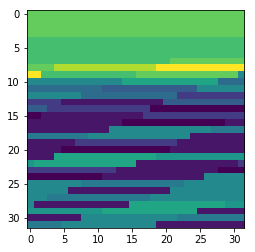

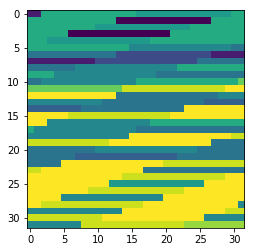

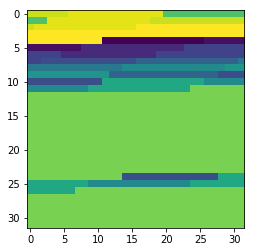

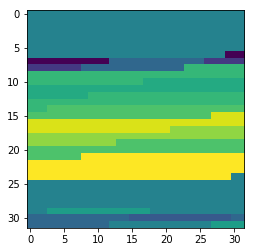

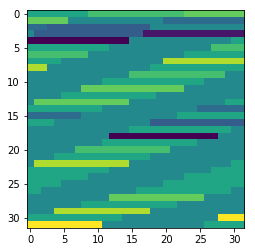

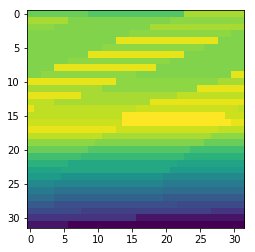

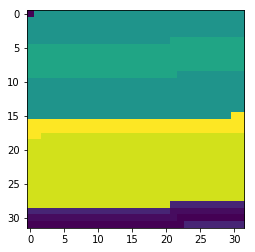

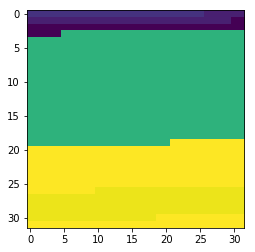

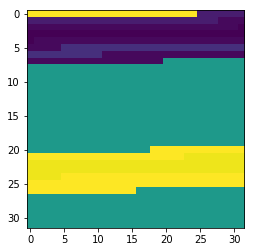

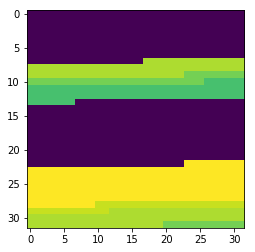

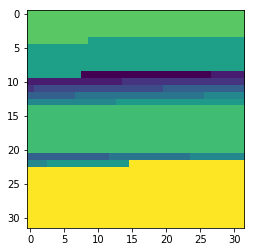

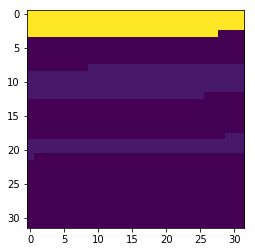

________________________________________________


IndexError: index 37 is out of bounds for axis 0 with size 37

In [8]:
# pizza = GpizzaBmidi_10000(midi_data)
# plt.imshow(pizza/128)
# plt.show()
# print(pizza[0:1])

pizza = GpizzaBmidi_n_1024(midi_data)
print(pizza.shape[0])
pizza.shape = (37,32,32)
for i in range(10):
    for j in range(37):
        plt.imshow(pizza[i*37+j]/128)
        plt.show()
    print("________________________________________________")
#     print(pizza[i])
    

In [15]:
work_dir = 'C:\\Users\\Arnold\\Desktop\\4560\\practice\\0 dataset midi'

x_data = []
y_data = []
labellist = []
labelnumber = 0
flag_first_data = 0

for parent, dirnames, filenames in os.walk(work_dir,  followlinks=True):
    for filename in filenames:
        if filename.endswith(".mid"):
            file_path = os.path.join(parent, filename)
            midi = pretty_midi.PrettyMIDI(file_path)
            data = GpizzaBmidi_n_1024(midi)

            if flag_first_data == 0:
                x_data = data
                flag_first_data = 1
            else:
                x_data = np.vstack((x_data,data))
            labellist.append(filename)
            for i in range(data.shape[0]):
                y_data.append(labelnumber)
            labelnumber+=1

            print(y_data[-1],x_data.shape,len(y_data))

0 (10, 1024) 10
1 (23, 1024) 23
2 (40, 1024) 40
3 (59, 1024) 59
4 (71, 1024) 71
5 (86, 1024) 86
6 (110, 1024) 110
7 (134, 1024) 134
8 (159, 1024) 159
9 (181, 1024) 181
10 (211, 1024) 211
11 (235, 1024) 235
12 (250, 1024) 250
13 (277, 1024) 277
14 (332, 1024) 332
15 (369, 1024) 369
16 (415, 1024) 415
17 (427, 1024) 427
18 (435, 1024) 435
19 (442, 1024) 442
20 (500, 1024) 500
21 (514, 1024) 514
22 (589, 1024) 589
23 (652, 1024) 652
24 (686, 1024) 686
25 (703, 1024) 703
26 (733, 1024) 733
27 (772, 1024) 772
28 (810, 1024) 810
29 (832, 1024) 832
30 (871, 1024) 871
31 (903, 1024) 903
32 (921, 1024) 921
33 (949, 1024) 949
34 (978, 1024) 978
35 (1027, 1024) 1027
36 (1053, 1024) 1053
37 (1069, 1024) 1069
38 (1085, 1024) 1085
39 (1104, 1024) 1104
40 (1114, 1024) 1114
41 (1125, 1024) 1125
42 (1137, 1024) 1137
43 (1164, 1024) 1164
44 (1186, 1024) 1186
45 (1254, 1024) 1254
46 (1281, 1024) 1281
47 (1319, 1024) 1319
48 (1360, 1024) 1360
49 (1376, 1024) 1376
50 (1393, 1024) 1393
51 (1422, 1024) 1422


In [21]:
np.savetxt(r"C:\Users\Arnold\Desktop\4560\practice\0 dataset midi\0 x_data_n_1024.txt",
           x_data,fmt='%d',delimiter=',')

In [22]:
a_y_data = np.zeros((1,len(y_data)),dtype=int)
for i in range(len(y_data)):
    a_y_data[0,i]=y_data[i]
np.savetxt(r"C:\Users\Arnold\Desktop\4560\practice\0 dataset midi\0 y_data_n_1024.txt",
           a_y_data,fmt='%d',delimiter=',')

In [23]:
a_labellist = np.zeros((1,len(labellist)),dtype=str)
for i in range(len(labellist)):
    a_labellist[0,i]=labellist[i]
np.savetxt(r"C:\Users\Arnold\Desktop\4560\practice\0 dataset midi\0 labellist_n_1024.txt",
           labellist,fmt='%s',delimiter=',')